In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

In [2]:
place = 'тверской, Москва'
local_crs = 32637

In [3]:
# Fetch OSM street network from the location
G = ox.graph_from_place(place)

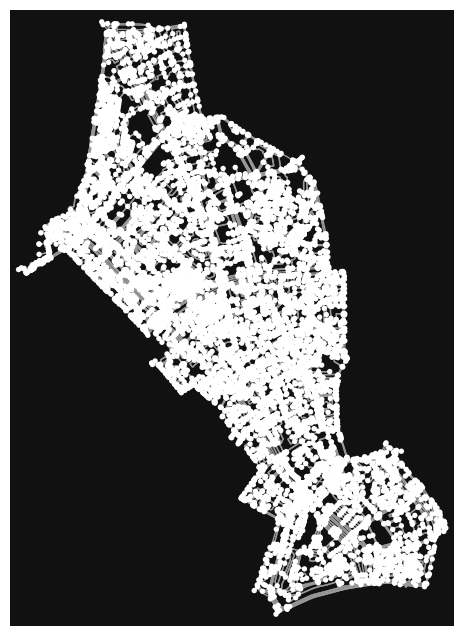

In [16]:
# Plot the streets
fig, ax = ox.plot_graph(G)

## Graph to GeoDataFrame

In [15]:
 # Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(G)

In [24]:
area = ox.geocode_to_gdf(place) 
buildings = ox.geometries_from_place(place, tags={'building':True}) # Retrieve buildings from the area:
# Retrieve restaurants
restaurants = ox.geometries_from_place(place, 
                                  tags={"amenity": "restaurant"}
                                 )
leisure = ox.geometries_from_place(place, tags={'leisure':True}) # fetch data

## Points-of-interest

In [25]:
buildings.head()

colour             operator  ref  \
element_type osmid                                         
node         1835557576    NaN                  NaN  NaN   
             1997933510    NaN                  NaN  NaN   
             2134689719    NaN  ООО «Комхоз-Сервис»  NaN   
             2591217665    NaN  ООО «Комхоз-Сервис»  NaN   
             2967468690    NaN  ООО «Комхоз-Сервис»  NaN   

                                          geometry note railway wheelchair  \
element_type osmid                                                           
node         1835557576  POINT (37.59264 55.78878)  NaN     NaN        NaN   
             1997933510  POINT (37.59597 55.78528)  NaN     NaN        NaN   
             2134689719  POINT (37.62088 55.77168)  NaN     NaN        NaN   
             2591217665  POINT (37.63274 55.75603)  NaN     NaN        NaN   
             2967468690  POINT (37.60347 55.76619)  NaN     NaN        NaN   

                        historic              name fixme  ... name:ja name:nl  \
element_type osmid                                        ...                   
node         1835557576      NaN               NaN   NaN  ...     NaN     NaN   
             1997933510      NaN               NaN   NaN  ...     NaN     NaN   
             2134689719      NaN  Городской туалет   NaN  ...     NaN     NaN   
             2591217665      NaN  Городской туалет   NaN  ...     NaN     NaN   
             2967468690      NaN  Городской туалет   NaN  ...     NaN     NaN   

                        name:nn name:ka name:hy stairs  \
element_type osmid                                       
node         1835557576     NaN     NaN     NaN    NaN   
             1997933510     NaN     NaN     NaN    NaN   
             2134689719     NaN     NaN     NaN    NaN   
             2591217665     NaN     NaN     NaN    NaN   
             2967468690     NaN     NaN     NaN    NaN   

                        building:levels:underground building:parts  \
element_type osmid                                                   
node         1835557576                         NaN            NaN   
             1997933510                         NaN            NaN   
             2134689719                         NaN            NaN   
             2591217665                         NaN            NaN   
             2967468690                         NaN            NaN   

                        construction:tourism craft  
element_type osmid                                  
node         1835557576                  NaN   NaN  
             1997933510                  NaN   NaN  
             2134689719                  NaN   NaN  
             2591217665                  NaN   NaN  
             2967468690                  NaN   NaN  

[5 rows x 254 columns]

In [ ]:
# Available columns
buildings.columns

In [ ]:
restaurants.head()

In [ ]:
# Available columns
restaurants.columns

In [32]:
leisure["leisure"].value_counts() # check all values for the column

playground         134
pitch               52
park                41
sports_centre       22
fitness_centre      19
fitness_station     17
outdoor_seating      9
dog_park             7
garden               6
escape_game          2
bandstand            2
dance                1
sauna                1
ice_rink             1
miniature_golf       1
stadium              1
Name: leisure, dtype: int64

In [33]:
parks = leisure[leisure["leisure"].isin(["pitch","park","playground", "outdoor_seating", "dog_park"])] # select all park polygons

In [29]:
from pyproj import CRS

# Set projection
projection = CRS.from_epsg(local_crs)

# Re-project layers
area = area.to_crs(projection)
edges = edges.to_crs(projection)
buildings = buildings.to_crs(projection)
restaurants = restaurants.to_crs(projection)parks = parks.to_crs(projection) # re-project the park polygons and add them to our map:
parks = parks.to_crs(projection) # re-project the park polygons and add them to our map:

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot the parks
parks.plot(ax=ax, facecolor="green")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='orange', alpha=0.7, markersize=10)
plt.tight_layout()